In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

In [4]:
df=pd.read_csv("teleCust1000t.csv")

In [5]:
df.columns

Index(['region', 'tenure', 'age', 'marital', 'address', 'income', 'ed',
       'employ', 'retire', 'gender', 'reside', 'custcat'],
      dtype='object')

In [6]:
#X=df.iloc[:,:-1].values
X = df[['tenure','age', 'address', 'income', 'employ', 'ed', 'retire']] .values
y=df.iloc[:,11].values

In [7]:
X1=np.array(X)
y1=np.array(y)

In [8]:
pipe = Pipeline ([('Poly', PolynomialFeatures(degree=2, interaction_only=True, include_bias=True, order='F')), ('Scaler',StandardScaler())])
X = pipe.fit_transform (X1)

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y1,test_size=0.2,random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (800, 29) (800,)
Test set: (200, 29) (200,)


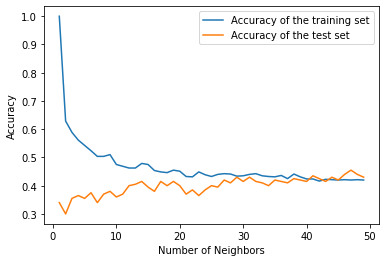

In [10]:
training_accuracy = []
test_accuracy = []

#try KNN for diffrent k nearest neighbor from 1 to 50
neighbors_setting = range(1,50)

for n_neighbors in neighbors_setting:
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)
    knn.fit(X_train,y_train)
    training_accuracy.append(knn.score(X_train, y_train))
    test_accuracy.append(knn.score(X_test, y_test))
 
plt.plot(neighbors_setting,training_accuracy, label='Accuracy of the training set')
plt.plot(neighbors_setting,test_accuracy, label='Accuracy of the test set')
plt.ylabel('Accuracy')
plt.xlabel('Number of Neighbors')
plt.legend()

In [11]:
for i in range(0,len(test_accuracy)):
    print("K=",i+1,"accuracy=",test_accuracy[i])

K= 1 accuracy= 0.34
K= 2 accuracy= 0.3
K= 3 accuracy= 0.355
K= 4 accuracy= 0.365
K= 5 accuracy= 0.355
K= 6 accuracy= 0.375
K= 7 accuracy= 0.34
K= 8 accuracy= 0.37
K= 9 accuracy= 0.38
K= 10 accuracy= 0.36
K= 11 accuracy= 0.37
K= 12 accuracy= 0.4
K= 13 accuracy= 0.405
K= 14 accuracy= 0.415
K= 15 accuracy= 0.395
K= 16 accuracy= 0.38
K= 17 accuracy= 0.415
K= 18 accuracy= 0.4
K= 19 accuracy= 0.415
K= 20 accuracy= 0.4
K= 21 accuracy= 0.37
K= 22 accuracy= 0.385
K= 23 accuracy= 0.365
K= 24 accuracy= 0.385
K= 25 accuracy= 0.4
K= 26 accuracy= 0.395
K= 27 accuracy= 0.42
K= 28 accuracy= 0.41
K= 29 accuracy= 0.43
K= 30 accuracy= 0.415
K= 31 accuracy= 0.43
K= 32 accuracy= 0.415
K= 33 accuracy= 0.41
K= 34 accuracy= 0.4
K= 35 accuracy= 0.42
K= 36 accuracy= 0.415
K= 37 accuracy= 0.41
K= 38 accuracy= 0.425
K= 39 accuracy= 0.42
K= 40 accuracy= 0.415
K= 41 accuracy= 0.435
K= 42 accuracy= 0.425
K= 43 accuracy= 0.415
K= 44 accuracy= 0.43
K= 45 accuracy= 0.42
K= 46 accuracy= 0.44
K= 47 accuracy= 0.455
K= 48 

In [12]:
#WE CAN SEE, AT K=47, WE GET BEST ACCURACY
knn=KNeighborsClassifier(n_neighbors=47)
knn.fit(X_train,y_train)
pred=knn.predict(X_test)
print(knn.score(X_test,y_test))

0.455


In [13]:
out1=  pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': pred.flatten()})
print(out1.head(10))

   Actual  Predicted
0       4          1
1       1          1
2       1          4
3       2          4
4       4          4
5       4          4
6       3          3
7       1          1
8       3          3
9       4          2


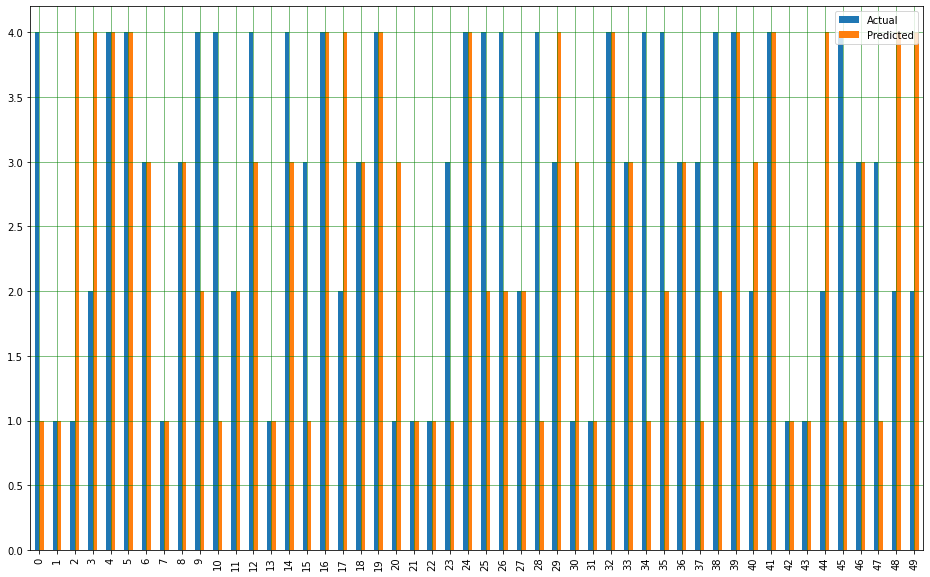

In [14]:
out1.head(50).plot(kind='bar', figsize=(16,10))
plt.grid(which='major', linestyle='-',linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':',linewidth='0.5', color='black')
plt.show()

In [15]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
result = confusion_matrix(y_test, pred)
print("Confusion Matrix:")
print(result)
result1 = classification_report(y_test, pred)
print("Classification Report:",)
print (result1)
result2 = accuracy_score(y_test,pred)
print("Accuracy:",result2)

Confusion Matrix:
[[34  1 12  4]
 [ 6 16 13  9]
 [19  4 26  5]
 [16 13  7 15]]
Classification Report:
              precision    recall  f1-score   support

           1       0.45      0.67      0.54        51
           2       0.47      0.36      0.41        44
           3       0.45      0.48      0.46        54
           4       0.45      0.29      0.36        51

    accuracy                           0.46       200
   macro avg       0.46      0.45      0.44       200
weighted avg       0.46      0.46      0.44       200

Accuracy: 0.455
